# 使用opencv进行傅立叶变换

In [3211]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = "phot_img/RSDD/Type2RSDDsdataset/Railsurfaceimages/rail_1.jpg"
# img_path = "phot_img/ciwa/MT_Blowhole/Imgs/exp1_num_327970.jpg"
# img_path = "phot_img/ciwa/MT_Crack/Imgs/exp1_num_3191.jpg"
# img_path = "phot_img/RSDD/Type2RSDDsdataset/Railsurfaceimages/rail_69.jpg"
# img_path = "phot_img/image.png"
# img_path = "auto_process/test_img/black.png"
ori_img = cv2.imread(img_path, 0)
ori_dft = cv2.dft(np.float32(ori_img), flags=cv2.DFT_COMPLEX_OUTPUT)
# dft = cv2.dft(np.float32(img), flags=cv2.DFT_REAL_OUTPUT)
# result = 20 * np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1]))
# result = cv2.magnitude(dft[:, :, 0], dft[:, :, 1])
ori_dftShift = np.fft.fftshift(ori_dft)
ori_result = cv2.magnitude(ori_dftShift[:, :, 0], ori_dftShift[:, :, 1])

img = ori_img#cv2.GaussianBlur(ori_img,(3,3),1,1)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
# dft = cv2.dft(np.float32(img), flags=cv2.DFT_REAL_OUTPUT)
# result = 20 * np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1]))
# result = cv2.magnitude(dft[:, :, 0], dft[:, :, 1])
dftShift = np.fft.fftshift(dft)
result = cv2.magnitude(dftShift[:, :, 0], dftShift[:, :, 1])
# result = 20 * np.log(cv2.magnitude(dftShift[:, :, 0], dftShift[:, :, 1]))
# print(result)

## 幅值归一化

In [3212]:
dftShift[:,:,0]/=result
dftShift[:,:,1]/=result

## 逆傅立叶变换

In [3213]:
ishift=np.fft.ifftshift(dftShift)
im2 = cv2.idft(ishift)
im=cv2.magnitude(im2[:,:,0],im2[:,:,1])
# im = im2[:,:,0]

In [3214]:
# im2

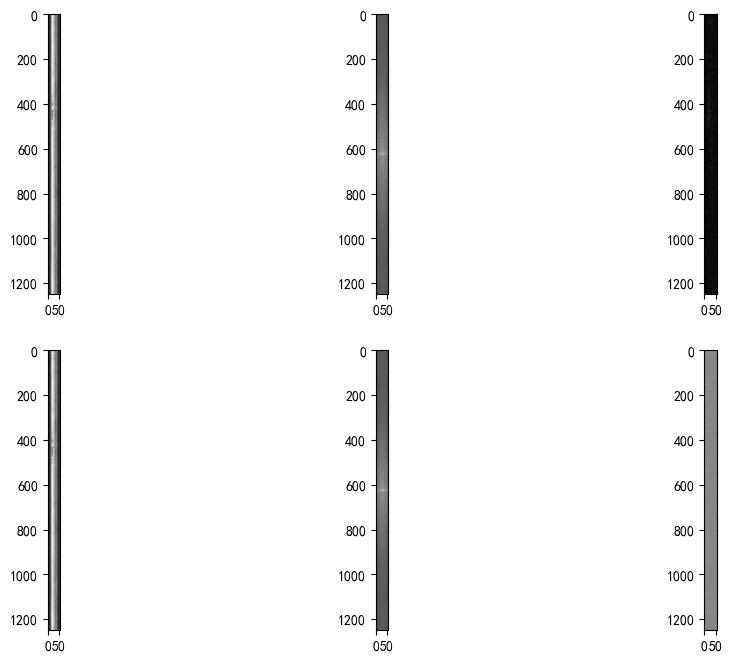

In [3215]:
plt.rcParams["figure.figsize"]= [12,8]
plt.subplot(2,3,1)
plt.imshow(img,cmap="gray")
plt.subplot(2,3,2)
plt.imshow(20 * np.log(result),cmap="gray")
plt.subplot(2,3,3)
plt.imshow(im,cmap="gray")
plt.subplot(2,3,4)
plt.imshow(ori_img,cmap="gray")
plt.subplot(2,3,5)
plt.imshow(20 * np.log(ori_result),cmap="gray")
plt.subplot(2,3,6)
plt.imshow(im2[:,:,1],cmap="gray")
plt.show()

In [3216]:
np.min(im2[:,:,0])

-2520.9302

## 试用nunpy进行傅立叶变换

(1250, 55) (1250, 55)


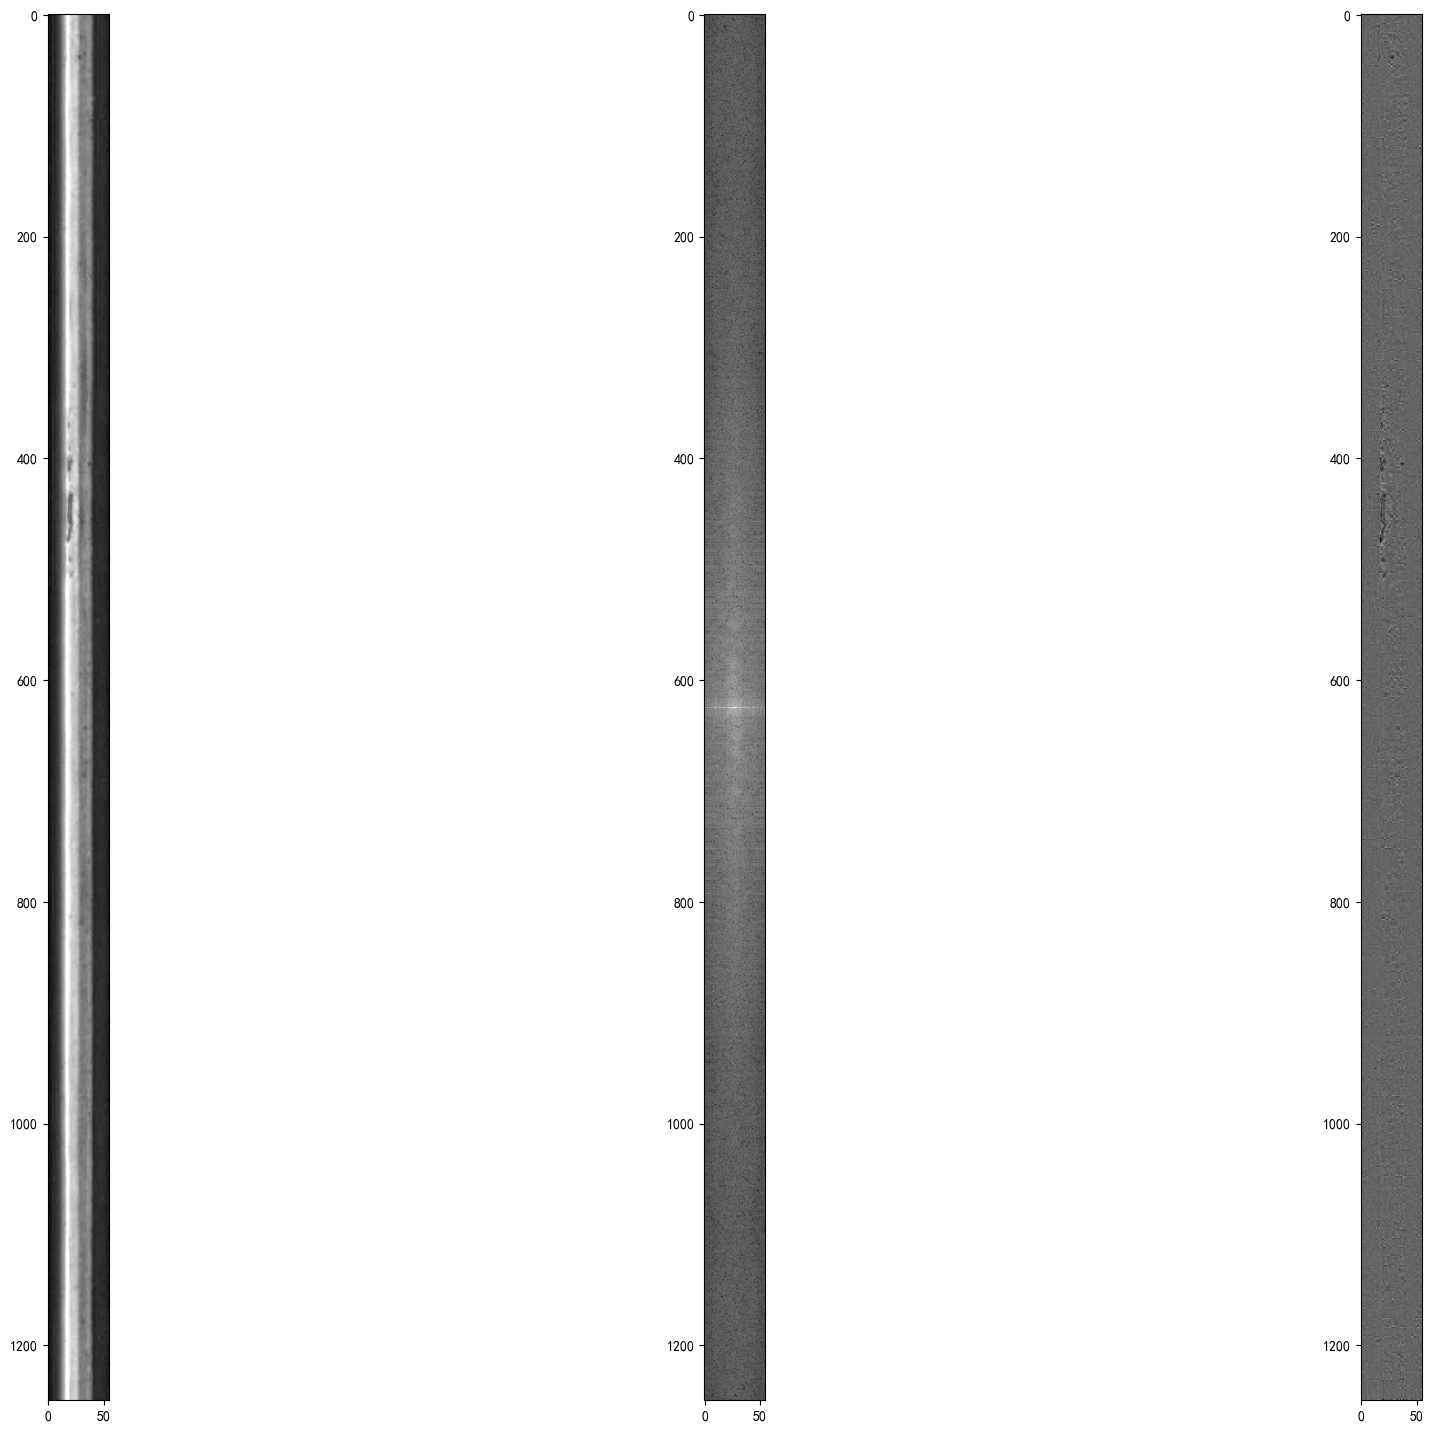

In [3245]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 读取图像
# img = plt.imread('phot_img/2.jpg')
img = cv2.imread(img_path, 0)


# 执行傅里叶变换
f = np.fft.fft2(img)
# f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)


# 将频谱平移，使得直流分量位于中心位置
fshift = np.fft.fftshift(f)

# 计算幅度谱
# magnitude_spectrum = 20 * np.log(np.abs(fshift))
magnitude_spectrum = np.abs(fshift)

print(f.shape,magnitude_spectrum.shape)
phase_spectrum = fshift/magnitude_spectrum
ishift2=np.fft.ifftshift(phase_spectrum)
y1 = np.fft.ifft2(ishift2)
# y = np.abs(y1)
y = np.real(y1)
# img1_p = cv2.normalize(np.abs(y), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# im=cv2.magnitude(ishift[:,:,0],ishift[:,:,1])

# 对幅度谱进行归一化处理
# magnitude_spectrum = (magnitude_spectrum - np.min(magnitude_spectrum)) / (np.max(magnitude_spectrum) - np.min(magnitude_spectrum))
tt=((y-np.min(y))/(np.max(y)-np.min(y)))*255

# 显示归一化后的幅度谱
# plt.imshow(magnitude_spectrum, cmap='gray')
plt.rcParams["figure.figsize"]= [24,18]
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(20 * np.log(magnitude_spectrum),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(y,cmap='gray')
plt.show()


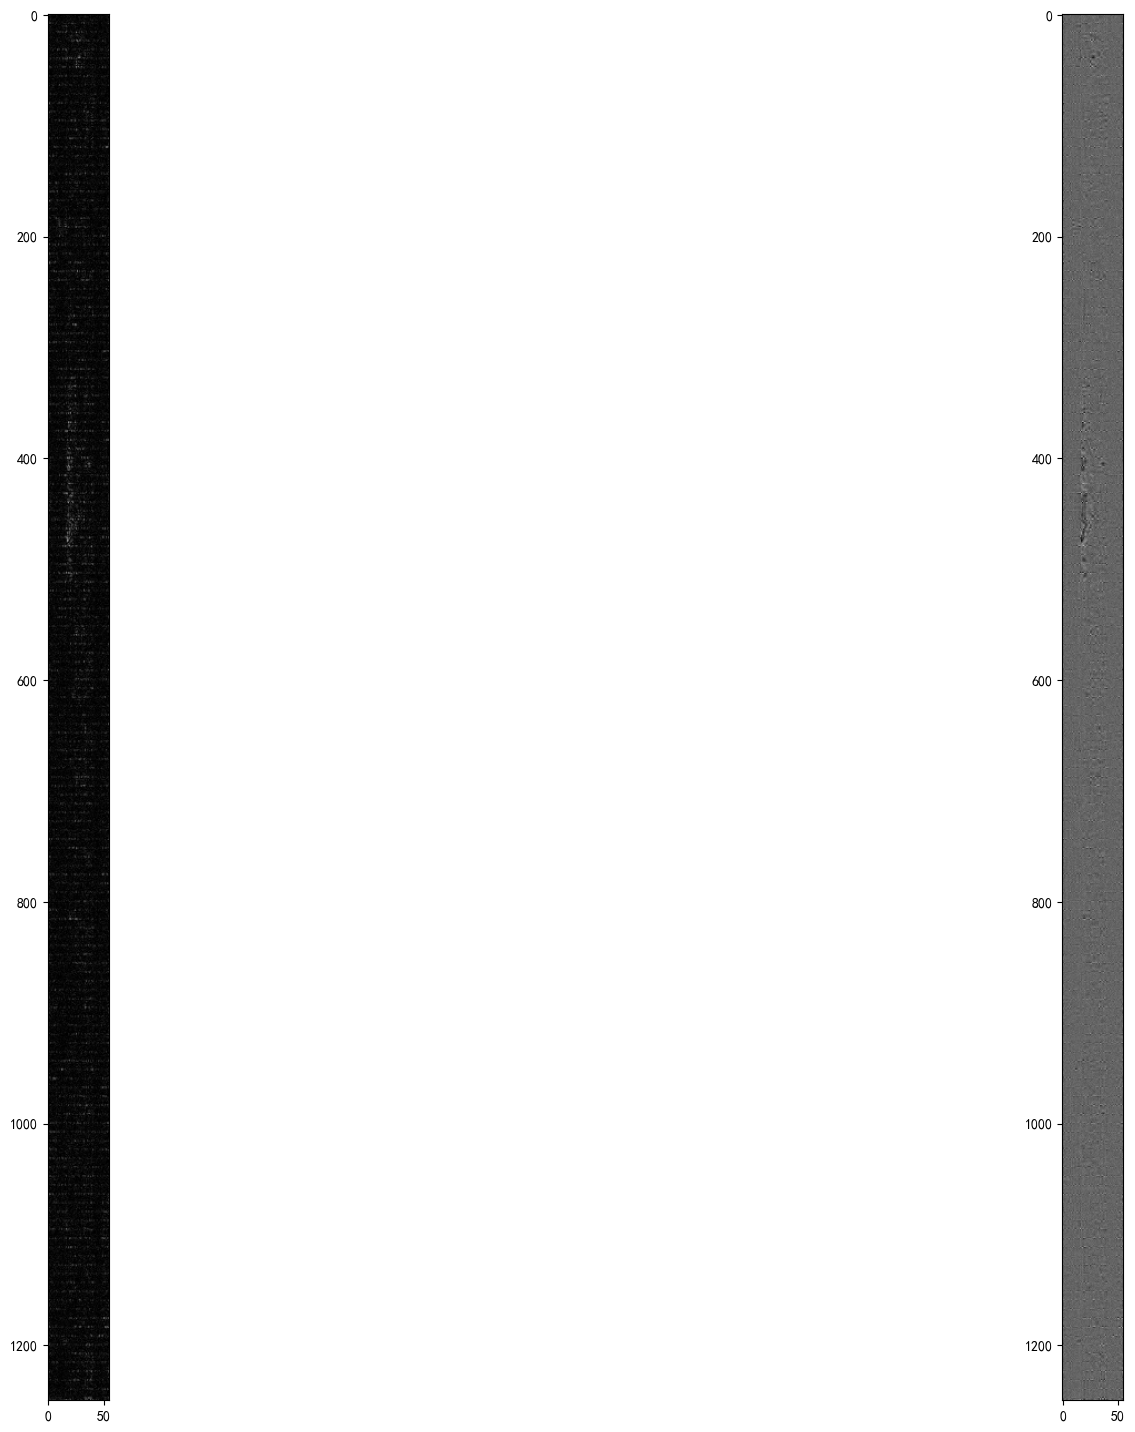

In [3218]:
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(tt,cmap='gray')
plt.show()

In [3225]:
sigma = 3.0  # 高斯核标准差
size = 7  # 高斯核大小
# 生成一个二维坐标系
x, y = np.mgrid[-(size//2):(size//2)+1, -(size//2):(size//2)+1]

# 计算高斯核的值
kernel = np.exp(-(x**2 + y**2)/(2*sigma**2))
kernel = kernel / kernel.sum() 

In [3226]:
# blur_img = cv2.GaussianBlur(im,(499,499),0)
blur_img = cv2.filter2D(im,-1,kernel=kernel)


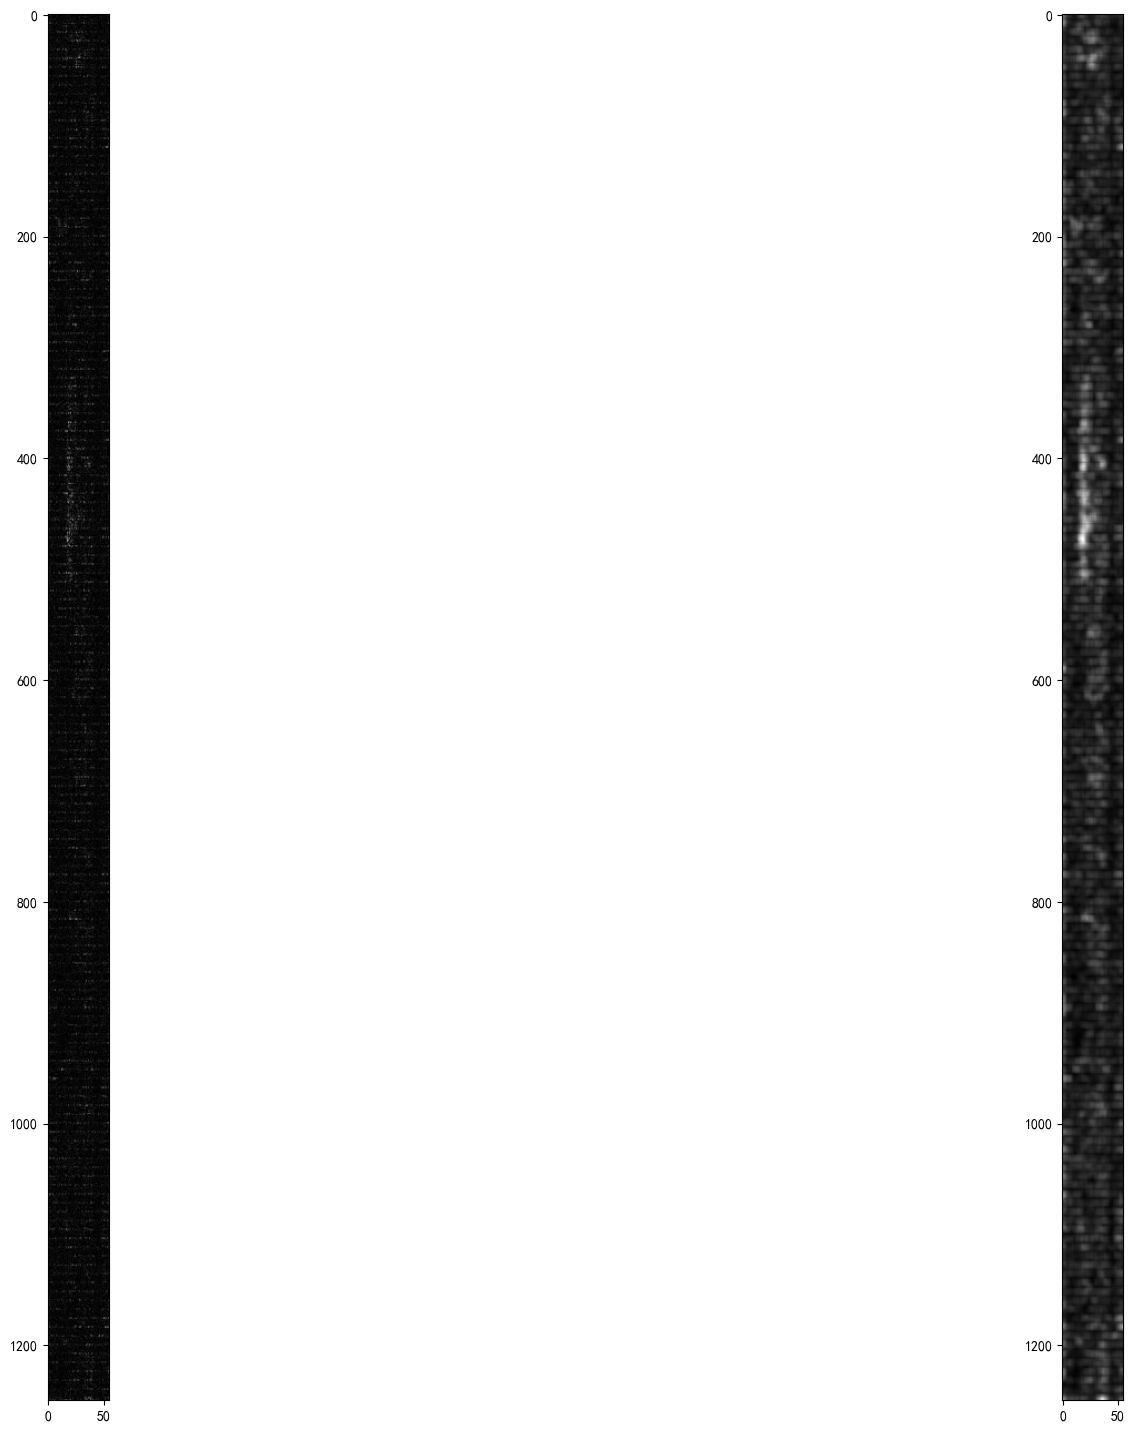

In [3227]:
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(blur_img,cmap='gray')
plt.show()

In [3228]:
target = np.clip(((im/blur_img)-1)*8200,0,255)#.astype(np.uint8)
# target = im/blur_img

In [3229]:
target

array([[255., 255., 255., ..., 255.,   0., 255.],
       [255., 255.,   0., ..., 255., 255., 255.],
       [255.,   0.,   0., ...,   0., 255.,   0.],
       ...,
       [255.,   0.,   0., ..., 255.,   0., 255.],
       [255., 255.,   0., ...,   0.,   0., 255.],
       [255., 255., 255., ..., 255.,   0., 255.]], dtype=float32)

In [3230]:
# plt.imshow(target,cmap="gray")
# plt.show()

In [3231]:
ma_img=(blur_img-np.mean(blur_img))/np.std(blur_img)
# ma_img=(target-np.mean(target))/np.std(target)
# 

In [3232]:
np.std(ma_img)

1.0

In [3233]:
ma_img2 = ma_img.copy()

In [3234]:
dark_mask = ma_img<4
bright_mask = ma_img>=4

In [3235]:
print(np.sum(dark_mask),np.sum(bright_mask))

68206 544


In [3236]:
ma_img[dark_mask]=0
ma_img[bright_mask]=255

In [3237]:
# sum(ma_img)

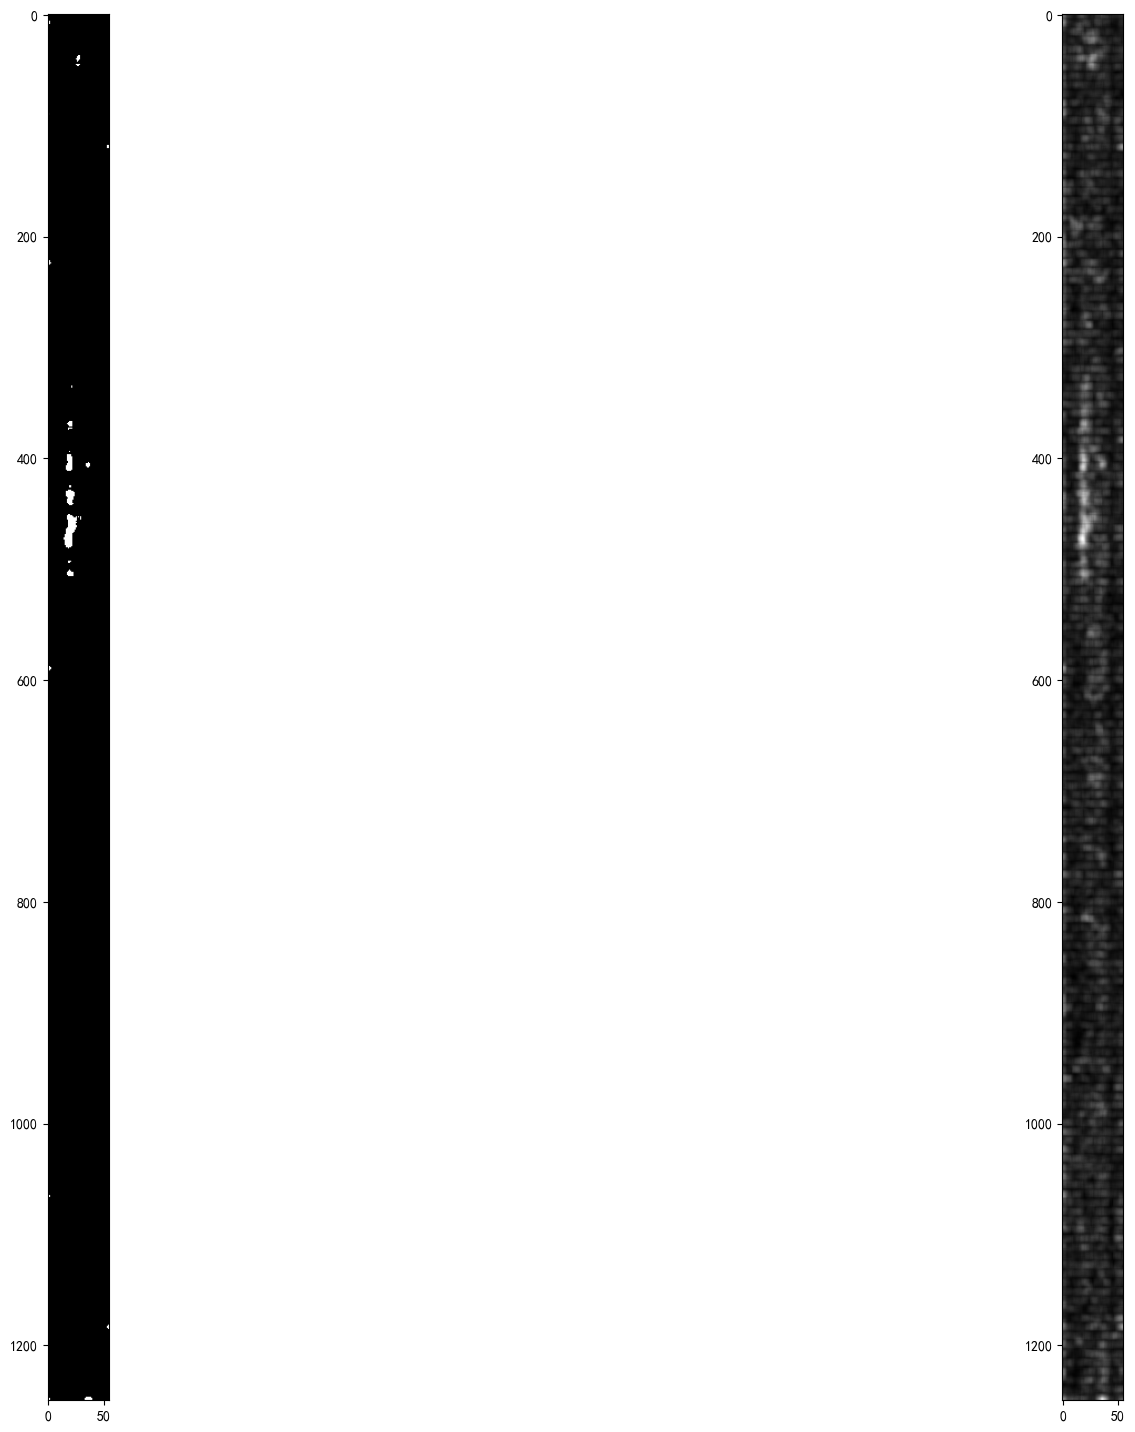

In [3238]:
plt.subplot(1,2,1)
plt.imshow(ma_img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ma_img2,cmap='gray')
plt.show()

In [3239]:
_, fgmask = cv2.threshold(ma_img, 100, 255, cv2.THRESH_BINARY_INV)
fgmask = np.array(fgmask,dtype=np.uint8)

In [3240]:
contours, hierarchy = cv2.findContours(fgmask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)#查找轮廓，输入的是二值图像
i = 0
for c in contours:
    perimeter = cv2.arcLength(c, True) #计算这个轮廓的周长
#     print(perimeter)
    if perimeter > 30 and perimeter < 1000: #轮廓周长大于188才画出来
        m = i
        x, y, w, h = cv2.boundingRect(c) #找到三角形的上右边界
        print(x,y,w,h)
        cv2.rectangle(img, (x, y), (x + w, y + h), (123, 123), 2)
        # cv2.imshow(str(i), fgmask)
        # cv2.imwrite('D:\cycFeng\Data\\'+str(i)+'.jpg', fgmask)
#         print(hierarchy[0][i])
    i += 1
# fgmask = cv2.cvtColor(fgmask, cv2.COLOR_GRAY2BGR)
# for cnt in contours:
#     fgmask = cv2.drawContours(fgmask, cnt, -1, (0, 0, 255), 2)

13 450 14 33
15 428 10 16
15 396 8 17


In [3241]:
fgmask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255]], dtype=uint8)

In [3242]:
len(contours)

16

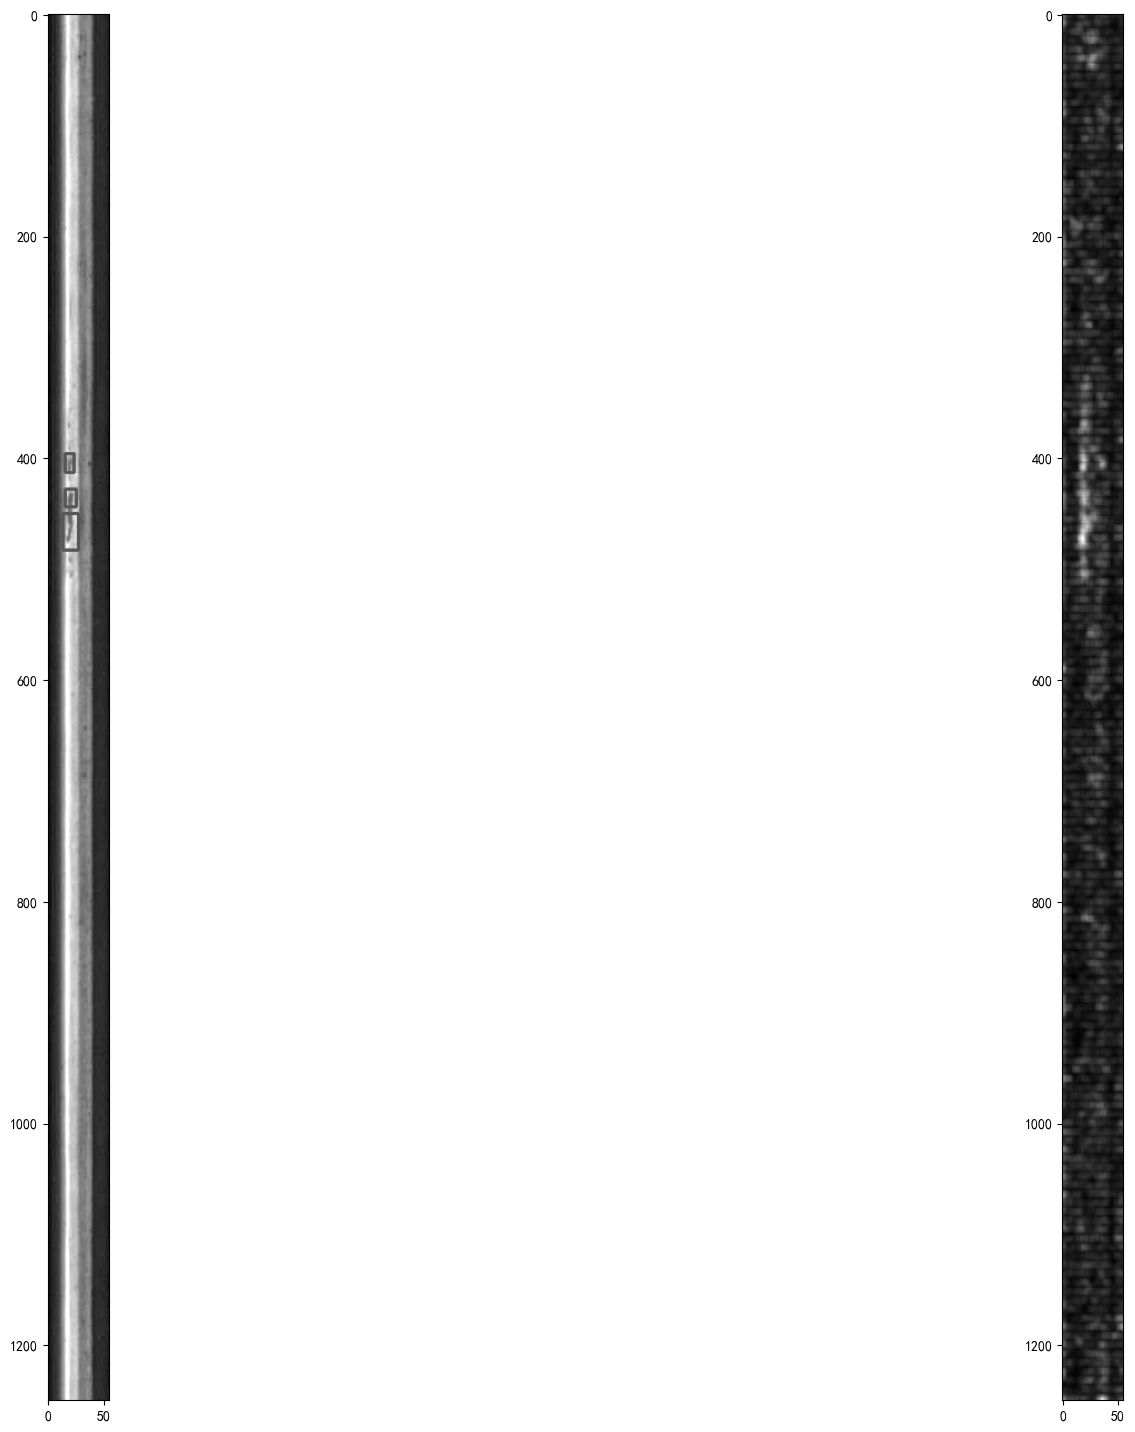

In [3243]:
plt.subplot(1,2,1)
plt.imshow(img
           ,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ma_img2,cmap='gray')
plt.show()

# np.real(y)，只会获取到实数部分,用这种方式获取到的边缘信息不是很清晰,np.abs等价于cv2.magnitude